<a href="https://colab.research.google.com/github/mojieve/Work-life-Balance/blob/main/Work_Life_Balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Here I import all libraries needed for this project

import pandas as pd # Functions for data processing and working with DataFrames
from pandas import DataFrame, read_csv #imports some of the important functions from the pandas library.

import numpy as np  # foundational package for scientific computing

# Scikit-learn: import preprocessing functions
from sklearn.preprocessing import LabelEncoder, label_binarize, OrdinalEncoder

import re           # Used for expression operations

# Matplotlib: used for data visualization/plotting
%matplotlib inline
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization

# Enable inline plotting, allows the plots to be seen in the notebook and stored with the document
%matplotlib inline


import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

# Importing statistical function for t-test from scipy
import scipy.stats as stats

# import KMeans
from sklearn.cluster import KMeans
# import nearest neighbors
#from sklearn.neighbors import NearestNeighbors

# import from sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## 1.Dataset

The dataset that I'm going to analyze in this project contains 15,000+ responses with 24 attributes to Authentic-Happiness.com global work-life survey. This online survey includes 23 questions about different ways that we design our lifestyle and achieve work-life balance.

Work-Life Balance survey evaluates how we thrive in both your professional and personal lives: it reflects how well you shape your lifestyle, habits and behaviors to maximize your overall life satisfaction along the following five dimensions:
1. Healthy body, reflecting your fitness and healthy habits;
2. Healthy mind, indicating how well you embrace positive emotions;
3. Expertise, measuring the ability to grow your expertise and achieve something unique;
4. Connection, assessing the strength of your social network and your inclination to discover the world;
5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.

This subject has been one of my favorite areas of interest and I have studied about it in my previous job experiences. That's why I'm going to study this dataset to figure out how people handle the balance between their work and personal life.


### 1.1. Reading Data from Files

In [ ]:
# Import dataset
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

In [ ]:
df.head(10)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/2015,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/2015,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/2015,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/2015,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/2015,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
5,7/8/2015,3,2,3,9,10,10,2,3,1,...,8,0,2,2,10,8,3,51 or more,Female,722.3
6,7/8/2015,4,2,10,6,10,10,3,5,2,...,7,10,0,2,10,8,10,51 or more,Male,727.2
7,7/9/2015,3,4,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,21 to 35,Female,676.2
8,7/9/2015,5,3,6,4,3,3,5,4,1,...,10,0,2,2,10,3,10,21 to 35,Female,702.8
9,7/10/2015,4,4,2,6,10,10,0,4,2,...,6,0,0,1,3,8,1,51 or more,Female,634.4


In [ ]:
df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

#### 1.1.1. Explaining Column Names

Timestamp (Numerical): The time that user has responded to the server
FRUITS_VEGGIES (Numerical): The number of fruit or vegetables that they eat each day. 
DAILY_STRESS (Categorical): The level of stress they experience each day.
PLACES_VISITED (Numerical): The number of new places they visit each year.
CORE_CIRCLE (Numerical): The number of people that they are very close to.
SUPPORTING_OTHERS (Numerical): The number of people they support to have better life.
SOCIAL_NETWORK (Numerical): The number of people that they interact during a day.
ACHIEVEMENT (Numerical): The number of achievements that they have had in their life. 
DONATION (Numerical): The number of times that they donate their time to a good cause during a year.
BMI_RANGE (Categorical): If their Body Mass Index (BMI) is below or over 25. 
TODO_COMPLETED (Categorical): The level of completion of their to-do list in a week. 
FLOW (Numerical): The number of hours that they are fully dedicated on particular subject, in a day.
DAILY_STEPS (Numerical): The average number of steps they take during a day.
LIVE_VISION (Numerical): For how many years ahead they have a clear life vision. 
SLEEP_HOURS (Numerical): The average hours of sleep they have during a day.
LOST_VACATION (Numerical): The number of unused vacations during a year.
DAILY_SHOUTING (Numerical): The number of times in week that they get angry or shout.
SUFFICIENT_INCOME (Categorical): If they have sufficient income or not.
TIME_FOR_PASSION (Numerical): The number of hours that they dedicate to what they are passionate for, in a day.
WEEKLY_MEDITATION (Numerical): The number of times in week that they think about themselves (like meditation)
AGE (Categorical): Age group of participants. 
GENDER (Categorical): Gender of participants.
WORK_LIFE_BALANCE_SCORE (Numerical): The number of work life balance that that participants received in the first email.



### 1.2. Manipulating Data

#### 1.2.1. Finding and handling missing values

In [ ]:
# Finding missing values in the Wellbeing dataset
df.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

As we can see in the code, there are no missing values in the dataset.

#### 1.2.2. Converting Categorical Data

In [ ]:
# Listing the data types of the different columns in the Wellbeing dataset.
df.dtypes

Timestamp                   object
FRUITS_VEGGIES               int64
DAILY_STRESS                 int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

As we can see, the 'Daily_Stress' is an object that needs to be int64

In [ ]:
# Changing 'Daily_Stress' from 'object' to 'int'
df['DAILY_STRESS']=df['DAILY_STRESS'].astype(str).astype(int)

In [ ]:
df.dtypes

Timestamp                   object
FRUITS_VEGGIES               int64
DAILY_STRESS                 int32
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

Now, we need to change Age and Gender categories to int. For Age, First we should see, how many categories we have.

In [ ]:
# Finding out about the categories for AGE
print(df.AGE.nunique(), ' categories in AGE: ',df.AGE.unique())

4  categories in AGE:  ['36 to 50' '51 or more' '21 to 35' 'Less than 20']


There is a problem with categories names. We should change 'Less than 20' to '20 and less'

In [ ]:
# Changing 'Less than 20' to '20 and less'
df['AGE']=df['AGE'].replace('Less than 20', '20 or less')

In [ ]:
print(df.AGE.nunique(), ' categories in AGE: ',df.AGE.unique())

4  categories in AGE:  ['36 to 50' '51 or more' '21 to 35' '20 or less']


Now we have four categories. So we define it as below:

0 : 20 or less
1 : 21 to 35
2 : 36 to 50
3 : 51 or more

In [ ]:
# Use of LabelEncoder to convert the categories in 'AGE' into a new column 'AG'
le = LabelEncoder() #defines the labelEncoder
dfCat=df.copy()
dfCat['AG']=le.fit_transform(dfCat['AGE']) #label encoder learns from the data and then transforms it

In [ ]:
dfCat.iloc[20:40,20:26]

,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,AG
20,5,21 to 35,Male,652.9,1
21,10,21 to 35,Female,668.6,1
22,8,36 to 50,Male,709.4,2
23,7,36 to 50,Male,752.7,2
24,10,36 to 50,Female,677.7,2
25,1,21 to 35,Male,633.9,1
26,1,21 to 35,Male,628.8,1
27,2,21 to 35,Female,692.8,1
28,8,36 to 50,Female,673.2,2
29,7,20 or less,Female,673.9,0


In [ ]:
dfCat.AG.dtypes

dtype('int32')

For Gender we need to binarize it.

In [ ]:
# Binarizing the entries for 'Male' and 'Female' to '0' and '1'

dfCat.GENDER=label_binarize(dfCat.GENDER, classes=['Male','Female'])
dfCat.GENDER.value_counts()

1    9858
0    6113
Name: GENDER, dtype: int64

In [ ]:
dfCat.AG.head(5)

0    2
1    2
2    2
3    3
4    3
Name: AG, dtype: int32

In [ ]:
dfCat.iloc[40:60,20:26]

,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,AG
40,8,21 to 35,1,687.3,1
41,2,51 or more,1,635.9,3
42,10,51 or more,1,655.2,3
43,8,21 to 35,0,652.4,1
44,3,36 to 50,1,657.9,2
45,2,36 to 50,1,686.6,2
46,10,51 or more,1,732.7,3
47,7,21 to 35,1,685.5,1
48,10,51 or more,1,742.5,3
49,1,36 to 50,1,663.5,2


In [ ]:
dfCat.head(5)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,AG
0,7/7/2015,3,2,2,5,0,5,2,0,1,...,5,5,1,4,0,5,36 to 50,1,609.5,2
1,7/7/2015,2,3,4,3,8,10,5,2,2,...,2,2,2,3,2,6,36 to 50,1,655.6,2
2,7/7/2015,2,3,3,4,4,10,3,2,2,...,10,2,2,4,8,3,36 to 50,1,631.6,2
3,7/7/2015,3,3,10,3,10,7,2,5,2,...,7,5,1,5,2,0,51 or more,1,622.7,3
4,7/7/2015,5,1,3,3,10,4,2,4,2,...,0,0,2,8,1,5,51 or more,1,663.9,3


#### 1.2.3. Aggregation of Data


No data group in this dataset can be aggregated. 

## 2. Exploring Data

### 2.1 Analyzing the feasibility of values

In [ ]:
# The statistical description of the variable 'WORK_LIFE_BALANCE_SCORE'
dfCat.WORK_LIFE_BALANCE_SCORE.describe()

count    15971.000000
mean       666.750510
std         45.021103
min        480.000000
25%        636.000000
50%        667.700000
75%        698.500000
max        820.200000
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64

The average of Work-life balance score of the 15971 data points is 666.75 with a standard deviation of 45.02
The minimum score for Work-life balance is 480 and the the maximum is 820

In [ ]:
# Statistical description of all the variables
# I divided the columns into two parts.

print(dfCat.loc[:,:'DAILY_STEPS'].describe())
print(dfCat.loc[:,'LIVE_VISION':'AG'].describe())

       FRUITS_VEGGIES  DAILY_STRESS  PLACES_VISITED   CORE_CIRCLE  \
count    15971.000000  15971.000000    15971.000000  15971.000000   
mean         2.922672      2.791685        5.233235      5.508296   
std          1.442739      1.367801        3.311847      2.840287   
min          0.000000      0.000000        0.000000      0.000000   
25%          2.000000      2.000000        2.000000      3.000000   
50%          3.000000      3.000000        5.000000      5.000000   
75%          4.000000      4.000000        8.000000      8.000000   
max          5.000000      5.000000       10.000000     10.000000   

       SUPPORTING_OTHERS  SOCIAL_NETWORK   ACHIEVEMENT      DONATION  \
count       15971.000000    15971.000000  15971.000000  15971.000000   
mean            5.616179        6.474047      4.000689      2.715171   
std             3.241937        3.086643      2.755912      1.851556   
min             0.000000        0.000000      0.000000      0.000000   
25%             3.

This study is based on a survey, and because of that, all the answers have been pre-defined. So, all the data are within feasible ranges and based on the context.

### 2.2. Univariate data analysis

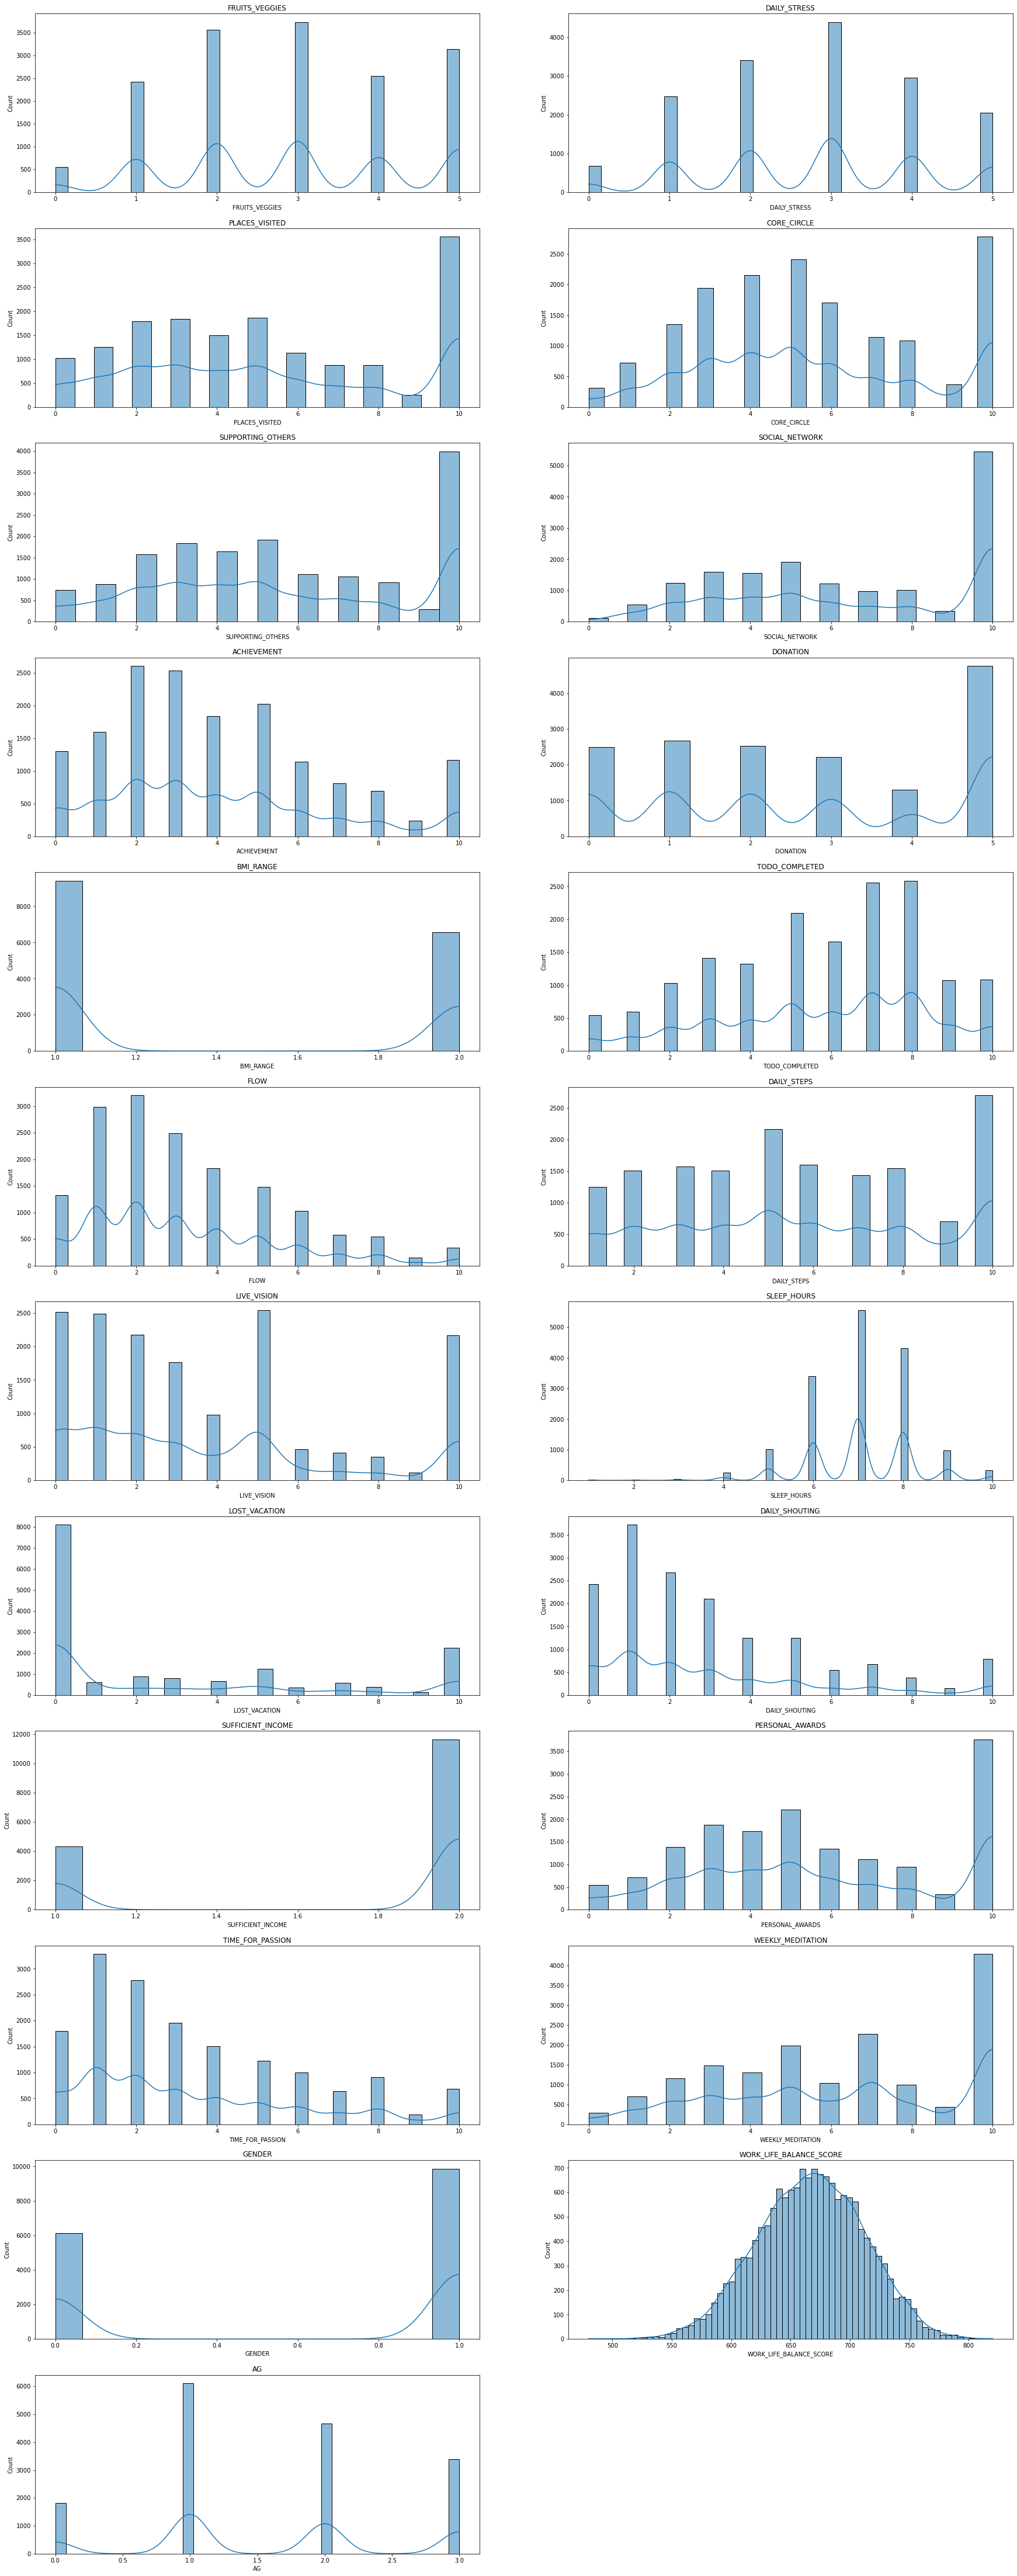

In [ ]:
# Histogram and KDE for all columns in Wellbeing dataset
columns=['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'GENDER', 'WORK_LIFE_BALANCE_SCORE', 'AG']
fig=plt.figure(figsize=(30,80))
i=1
for col in columns:
    plt.subplot(12,2,i)
    # Using seaborns histplot()
    sns.histplot(x=dfCat[col], kde=True)
    plt.title(col) # titles of the histogram are the names of columns
    i=i+1

•	As we know about our dataset, the answers have been chosen from the list. So, we can't have a good analysis or figuring out the type of distribution. For instance, about BMI, we can't see any distribution in histogram and just we can find out that the more than 60% of participants have BMI less than 25 which is good for health.
•	About 75% of participants are happy about their income and consider it as sufficient. 
•	The curves and histograms that are closest to a normal distribution are: FRUITS_VEGGIES', 'DAILY_STRESS', 'SLEEP_HOURS', ‘WORK_LIFE_BALANCE_SCORE' and 'AGE'


#### 2.2.1. Boxplot and handling of outliers

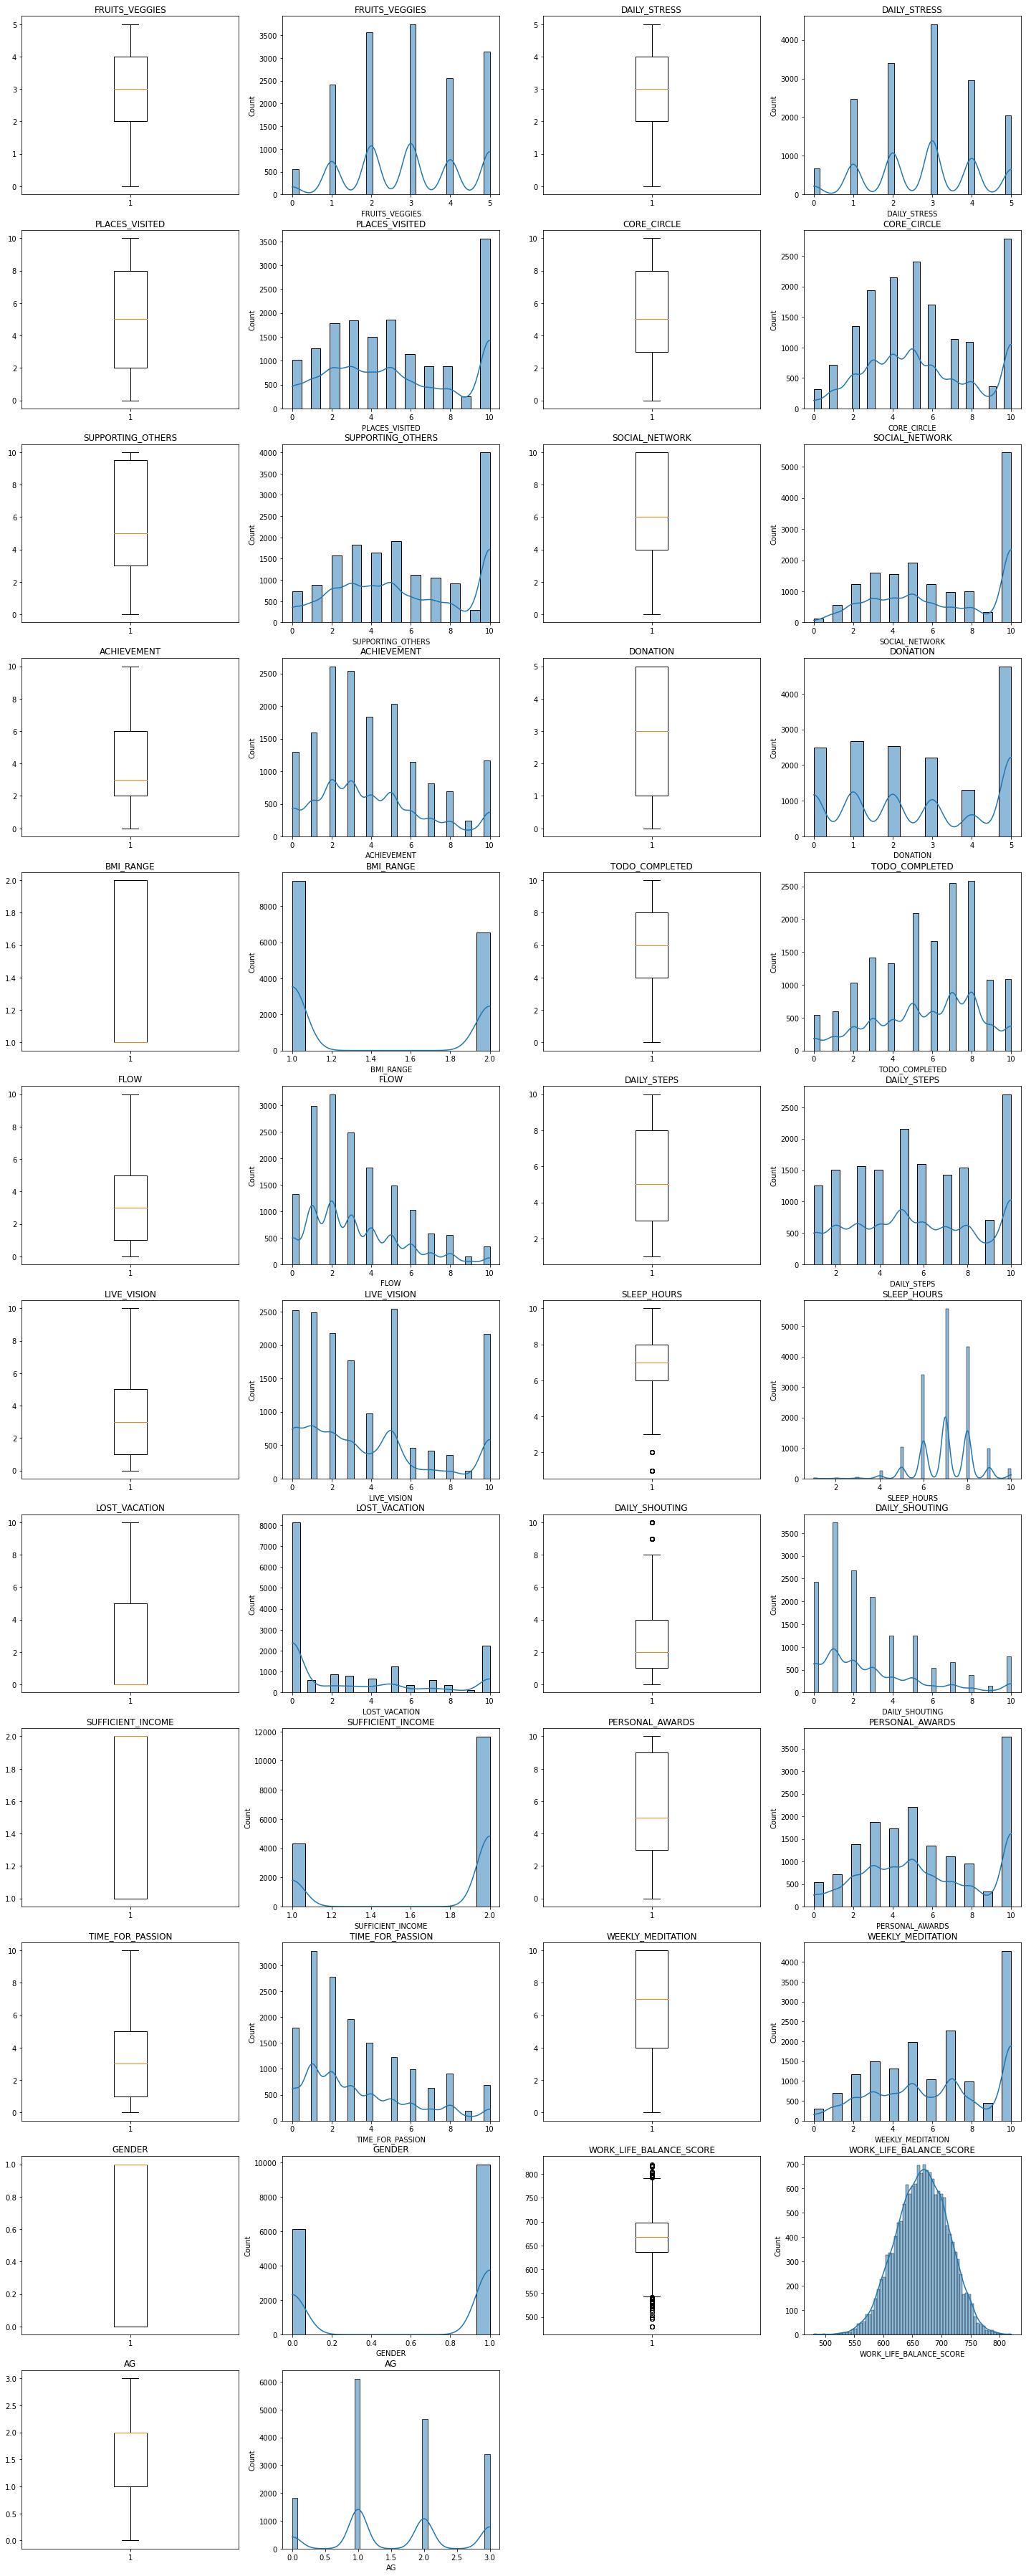

In [ ]:
# Boxplots and histograms with kde for all coulmns

fig=plt.figure(figsize=(25,65)) 
i=0 
for col in columns: 
    i=i+1 
    plt.subplot(12,4,i) 
    plt.boxplot(dfCat[col]) 
    plt.title(col) 
    i=i+1 
    plt.subplot(12,4,i) 
    sns.histplot(x=dfCat[col], kde=True) 
    plt.title(col) 

As I explained before, the dataset has been achieved from a survey with default answers for participants, that’s why there is no outlier in the features.

### 2.3. Looking at relations between variables (bivariate data analysis)

#### 2.3.1 Heatmaps

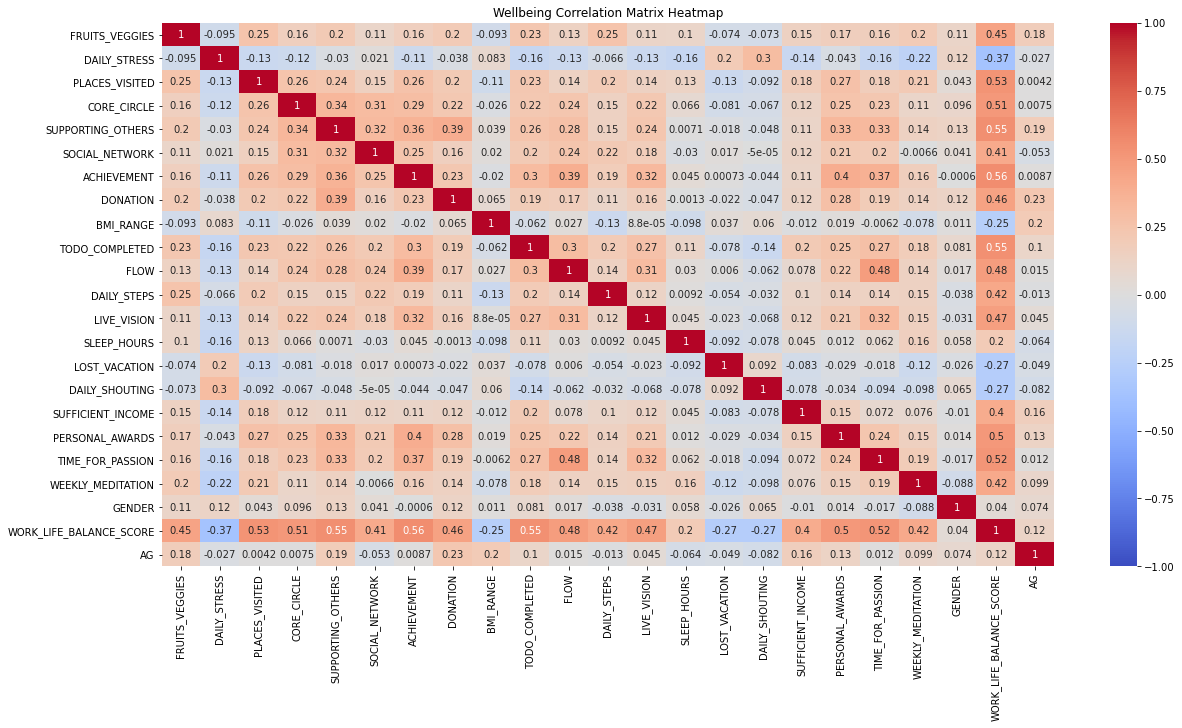

In [ ]:
# Heatmap of the Wellbeing dataset

plt.figure(figsize=(20,10))
sns.heatmap(dfCat.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Wellbeing Correlation Matrix Heatmap')
plt.show()


It is interesting to see that there are two high correlations:

‘TIME_FOR_PASSION’ – ‘FLOW’
‘PERSONAL_AWARDS’ – ‘ACHIEVEMENT’

‘TIME_FOR_PASSION’ is the time we dedicate to what we enjoy doing. It can be work, hobbies or volunteering. It is important to have time for passion in our busy lives because it is highly correlated with the FLOW’ which is, as described in the survey: "Flow is defined as the mental state, in which you are fully immersed in performing an activity. You then experience a feeling of energized focus, full involvement, and enjoyment in the process of this activity." Mihaly Csikszentmihalyi described it as " the secret to happiness"
According to the correlation maps people doing what they are passionate about have more personal awards and achievements in their life. and it correlate to ‘TODO_COMPLETED’ as well. in overall we can say that they are more successful.

Indeed, ‘WORK_LIFE_BALANCE_SCORE’ has a high correlation with below features:
‘PLACES_VISITED’, ‘CORE_CIRCLE’, ‘SUPPORTING_OTHERS’, ‘ACHIEVEMENT’, ‘TIME_FOR_PASSION’ and ‘TODO_COMPLETED’.

And it is obvious that, it has negative correlation with ‘WORK_LIFE_BALANCE_SCORE’ and ‘DAILY_STRESS’, ‘BMI_RANGE’, ‘LOST_VACATION’, ‘DAILY_SHOUTING’. 


#### 2.3.2 Scatterplots

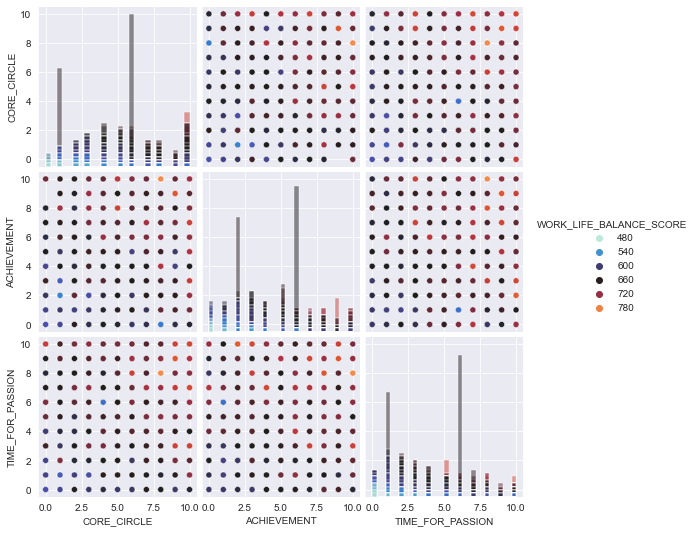

In [ ]:
# Scatterplots for ‘WORK_LIFE_BALANCE_SCORE’ ‘PLACES_VISITED’, ‘CORE_CIRCLE’, ‘SUPPORTING_OTHERS’, ‘ACHIEVEMENT’, ‘TIME_FOR_PASSION’ and ‘TODO_COMPLETED’

sns.set_style('darkgrid')

sns.pairplot(dfCat.loc[:,['WORK_LIFE_BALANCE_SCORE','CORE_CIRCLE', 
                      'ACHIEVEMENT', 'TIME_FOR_PASSION']], hue='WORK_LIFE_BALANCE_SCORE',diag_kind='hist', palette="icefire")


#### 2.3.3 Joint distribution plots with regression fit

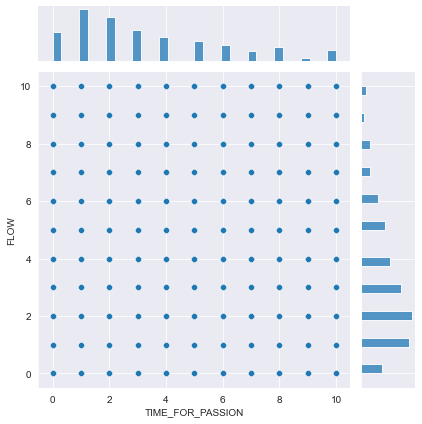

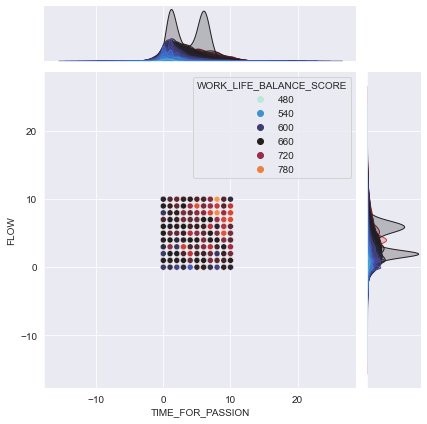

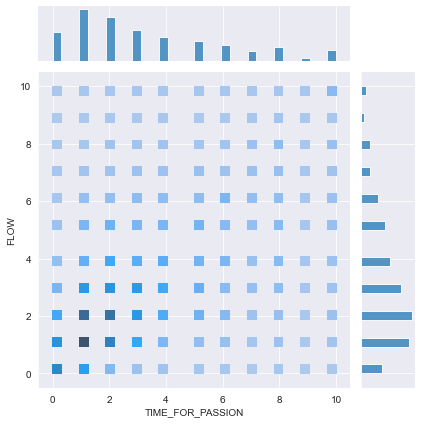

In [ ]:
# Joint distribution plots for ‘TIME_FOR_PASSION’ and ‘FLOW’

# Simple version:
sns.jointplot(data=dfCat, x='TIME_FOR_PASSION', y='FLOW')

# Adding hue='WORK_LIFE_BALANCE_SCORE' with palette="icefire"
sns.jointplot(data=dfCat, x='TIME_FOR_PASSION', y='FLOW',hue='WORK_LIFE_BALANCE_SCORE',palette="icefire")

# Adding some automatic kernel density estimation and regression
sns.jointplot(data=dfCat, x='TIME_FOR_PASSION', y='FLOW', kind='hist')

#### 2.3.4 Plotting category dependencies

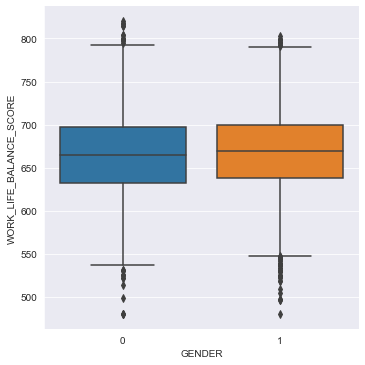

In [ ]:
# Comparing the distributions for WORK_LIFE_BALANCE_SCORE based on Gender
sns.catplot(data=dfCat,x="GENDER",  y="WORK_LIFE_BALANCE_SCORE", kind="box")

As we can see in the plots, the mean for work-life balance is almost the same in males and females.

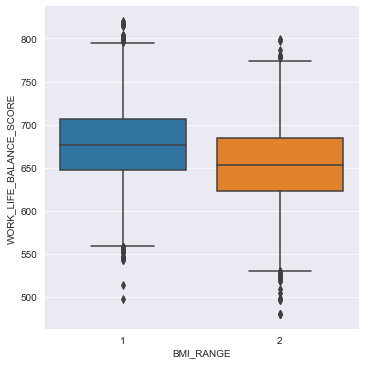

In [ ]:
# Comparing the distributions for WORK_LIFE_BALANCE_SCORE based on BMI
sns.catplot(data=dfCat,x="BMI_RANGE",  y="WORK_LIFE_BALANCE_SCORE", kind="box")

As we can see, the work-life balance score mean is lower in people with higher BMI.

### 2.4 Statistically relevant differences, t-test

In [ ]:
# Comparing the difference in the average of WORK_LIFE_BALANCE_SCORE between people with BMI over and under 25:
print('Average Work-life balance score with BMI lower than 25: ',dfCat.loc[dfCat.BMI_RANGE==1,'WORK_LIFE_BALANCE_SCORE'].mean())
print('Average Work-life balance score with BMI Higher than 25: ',dfCat.loc[dfCat.BMI_RANGE==2,'WORK_LIFE_BALANCE_SCORE'].mean())

Average Work-life balance score with BMI lower than 25:  676.2209497503483
Average Work-life balance score with BMI Higher than 25:  653.1571515706008


In [ ]:
# Running the t-test on WORK_LIFE_BALANCE_SCORE

BMI_le = dfCat.loc[dfCat.BMI_RANGE==1,'WORK_LIFE_BALANCE_SCORE']
BMI_le = dfCat.loc[dfCat.BMI_RANGE==2,'WORK_LIFE_BALANCE_SCORE']
stats.ttest_ind(BMI_le, BMI_le, equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

We may see in the result that the p-value is 1 > 0.05, so we may conclude that there is no significant difference in work-life balance score between people with various BMI ranges. It means work-life balance is not related to human's weight.


## 3. Clustering

### 3.1 & 3.2  Clustering with k-means method & Identifying the number of clusters

In [ ]:
dfCat.to_excel('dfCat.xlsx', sheet_name='dfCat')

In [ ]:
# I start with creating 2 clusters with K-means for my data

# First I creat a copy from my dataset

df_Cluster=dfCat.copy()

# Then we drop First, 'Timestamp' and 'AGE' coulmns

df_Cluster=df_Cluster.drop(columns=['Timestamp','AGE'])


In [ ]:
df_Cluster.head(5)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AG
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,1,609.5,2
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,1,655.6,2
2,2,3,3,4,4,10,3,2,2,2,...,8,10,2,2,4,8,3,1,631.6,2
3,3,3,10,3,10,7,2,5,2,3,...,5,7,5,1,5,2,0,1,622.7,3
4,5,1,3,3,10,4,2,4,2,5,...,7,0,0,2,8,1,5,1,663.9,3


In [ ]:
# Standard-scaling

sc=StandardScaler()
dfClusterNsc=sc.fit_transform(df_Cluster)
df_2Cluster=DataFrame(dfClusterNsc, index=df_Cluster.index, columns=df_Cluster.columns)
df_2Cluster.head(3)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AG
0,0.053599,-0.578819,-0.976294,-0.178965,-1.732407,-0.477572,-0.725985,-1.466473,-0.834683,0.096804,...,-0.035823,0.569258,0.773095,-1.63991,-0.553915,-1.218845,-0.408970,0.787468,-1.271677,0.421337
1,-0.639548,0.152304,-0.372383,-0.883141,0.735331,1.142362,0.362618,-0.386266,1.198059,-0.284280,...,0.798194,-0.243364,-0.347874,0.60979,-0.877598,-0.485987,-0.077447,0.787468,-0.247681,0.421337
2,-0.639548,0.152304,-0.674338,-0.531053,-0.498538,1.142362,-0.363118,-0.386266,1.198059,-1.427530,...,0.798194,1.923628,-0.347874,0.60979,-0.553915,1.712587,-1.072015,0.787468,-0.780781,0.421337


In [ ]:
# Create kmeans object with 2 clusters
kmeans_2df = KMeans(n_clusters=2)

# Fit kmeans model with dfCat data
kmeans_2df.fit(df_2Cluster)

# save the location of the centers of the clusters learned by kmeans object
center_2df=kmeans_2df.cluster_centers_

# save the labels of the clusters as DataFrame, using same index as in df_2Cluster
y_2df = DataFrame(kmeans_2df.labels_, index=df_2Cluster.index)

In [ ]:
# Add the cluster-numbers to a column 'Clusters' in dfCat
df_2Cluster['Clusters2']=y_2df
df_2Cluster.head(5)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AG,Clusters2
0,0.053599,-0.578819,-0.976294,-0.178965,-1.732407,-0.477572,-0.725985,-1.466473,-0.834683,0.096804,...,0.569258,0.773095,-1.63991,-0.553915,-1.218845,-0.408970,0.787468,-1.271677,0.421337,0
1,-0.639548,0.152304,-0.372383,-0.883141,0.735331,1.142362,0.362618,-0.386266,1.198059,-0.284280,...,-0.243364,-0.347874,0.60979,-0.877598,-0.485987,-0.077447,0.787468,-0.247681,0.421337,0
2,-0.639548,0.152304,-0.674338,-0.531053,-0.498538,1.142362,-0.363118,-0.386266,1.198059,-1.427530,...,1.923628,-0.347874,0.60979,-0.553915,1.712587,-1.072015,0.787468,-0.780781,0.421337,0
3,0.053599,0.152304,1.439352,-0.883141,1.352265,0.170402,-0.725985,1.234043,1.198059,-1.046447,...,1.111006,0.773095,-1.63991,-0.230232,-0.485987,-2.066583,0.787468,-0.978472,1.480214,0
4,1.439895,-1.309943,-0.674338,-0.883141,1.352265,-0.801558,-0.725985,0.693940,1.198059,-0.284280,...,-0.785113,-1.095186,0.60979,0.740817,-0.852416,-0.408970,0.787468,-0.063317,1.480214,0


In [ ]:
# Now we check how many itmes to we have in each cluster

print('\n Value counts of Cluster1: ')
df_2Cluster[(df_2Cluster['Clusters2'] == 0)].shape




 Value counts of Cluster1: 


(7993, 24)

In [ ]:
print('\n Value counts of Cluster2: ')
df_2Cluster[(df_2Cluster['Clusters2'] == 1)].shape


 Value counts of Cluster2: 


(7978, 24)

In [ ]:
# Now we try to creat a loop to create 10 clusters

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

# A list holds the SSE values for each k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_2Cluster)
    sse.append(kmeans.inertia_)

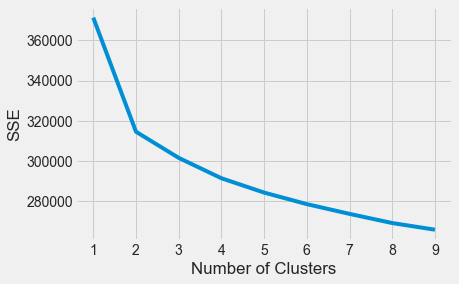

In [ ]:
# Plots the value for SSE found
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [ ]:
# So, We start to creat 3 clusters

# create kmeans object with 3 clusters
kmeans_3df = KMeans(init='random', n_clusters=3, n_init=10, max_iter=300, random_state=42)

# fit kmeans object to data
kmeans_3df.fit(df_2Cluster)

# save the location of the centers of the clusters learned by kmeans object
center_3df=kmeans_3df.cluster_centers_

# save Labels of each point
y_3df = DataFrame(kmeans_3df.labels_, index=df_2Cluster.index)

# Adding the labels to the overview table
df_2Cluster['Cluster3']=y_3df
y_3df.value_counts()

1    6769
2    4677
0    4525
dtype: int64

In [ ]:
df_2Cluster.head(5)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AG,Clusters2,Cluster3
0,0.053599,-0.578819,-0.976294,-0.178965,-1.732407,-0.477572,-0.725985,-1.466473,-0.834683,0.096804,...,0.773095,-1.63991,-0.553915,-1.218845,-0.408970,0.787468,-1.271677,0.421337,0,0
1,-0.639548,0.152304,-0.372383,-0.883141,0.735331,1.142362,0.362618,-0.386266,1.198059,-0.284280,...,-0.347874,0.60979,-0.877598,-0.485987,-0.077447,0.787468,-0.247681,0.421337,0,1
2,-0.639548,0.152304,-0.674338,-0.531053,-0.498538,1.142362,-0.363118,-0.386266,1.198059,-1.427530,...,-0.347874,0.60979,-0.553915,1.712587,-1.072015,0.787468,-0.780781,0.421337,0,0
3,0.053599,0.152304,1.439352,-0.883141,1.352265,0.170402,-0.725985,1.234043,1.198059,-1.046447,...,0.773095,-1.63991,-0.230232,-0.485987,-2.066583,0.787468,-0.978472,1.480214,0,0
4,1.439895,-1.309943,-0.674338,-0.883141,1.352265,-0.801558,-0.725985,0.693940,1.198059,-0.284280,...,-1.095186,0.60979,0.740817,-0.852416,-0.408970,0.787468,-0.063317,1.480214,0,1


In [ ]:
df_2Cluster.to_excel('df_2Cluster.xlsx', sheet_name='df_2Cluster')

In [ ]:
df_2Cluster['Respondents'] = np.arange(len(df_2Cluster))

In [ ]:
df_2Cluster.head(5)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AG,Clusters2,Cluster3,Respondents
0,0.053599,-0.578819,-0.976294,-0.178965,-1.732407,-0.477572,-0.725985,-1.466473,-0.834683,0.096804,...,-1.63991,-0.553915,-1.218845,-0.408970,0.787468,-1.271677,0.421337,0,0,0
1,-0.639548,0.152304,-0.372383,-0.883141,0.735331,1.142362,0.362618,-0.386266,1.198059,-0.284280,...,0.60979,-0.877598,-0.485987,-0.077447,0.787468,-0.247681,0.421337,0,1,1
2,-0.639548,0.152304,-0.674338,-0.531053,-0.498538,1.142362,-0.363118,-0.386266,1.198059,-1.427530,...,0.60979,-0.553915,1.712587,-1.072015,0.787468,-0.780781,0.421337,0,0,2
3,0.053599,0.152304,1.439352,-0.883141,1.352265,0.170402,-0.725985,1.234043,1.198059,-1.046447,...,-1.63991,-0.230232,-0.485987,-2.066583,0.787468,-0.978472,1.480214,0,0,3
4,1.439895,-1.309943,-0.674338,-0.883141,1.352265,-0.801558,-0.725985,0.693940,1.198059,-0.284280,...,0.60979,0.740817,-0.852416,-0.408970,0.787468,-0.063317,1.480214,0,1,4


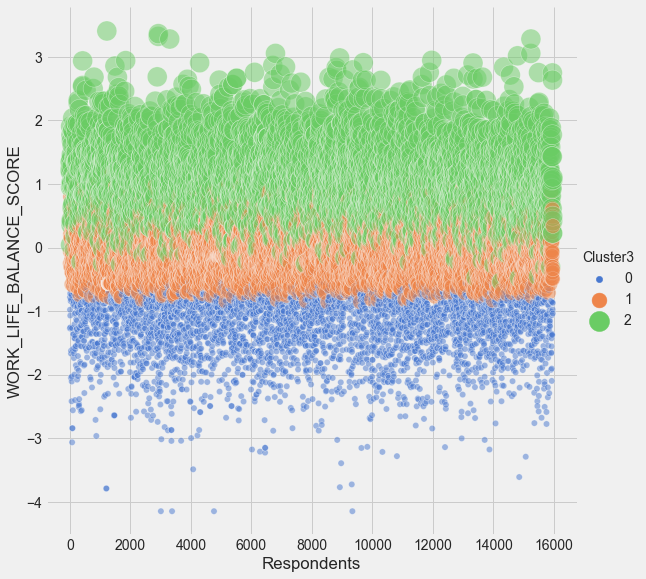

In [ ]:
# Plotting the values of WORK_LIFE_BALANCE_SCORE of all Respondents, coloring the clusters
sns.relplot(x="Respondents", y="WORK_LIFE_BALANCE_SCORE", hue="Cluster3", size="Cluster3",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=8, data=df_2Cluster)

So, as we can see in upper picture, we have three different clusters for WORK_LIFE_BALANCE_SCORE. In my opinion, the clustering doesn't give me so much information about this feature. It is clear that we our clusters are based on the three groups of people with Low, Medium and High WORK_LIFE_BALANCE_SCORE. As I did some research about it, maybe I have so many attributes and they suggested me to use Dimensionality Reduction methods like PCA which I'm going to use on next question.

## 3. Dimensionality reduction

In [ ]:
# First we need to create a dataset from the feutures that we want to use.


X=dfCat.loc[:,['DAILY_STRESS', 'FRUITS_VEGGIES','DAILY_STEPS', 'LIVE_VISION','SLEEP_HOURS',
       'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'DONATION',
       'SOCIAL_NETWORK', 'ACHIEVEMENT', 'LOST_VACATION', 
       'BMI_RANGE', 'TODO_COMPLETED', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION']]

In [ ]:
X.shape

(15971, 18)

In [ ]:
X.head(5)

,DAILY_STRESS,FRUITS_VEGGIES,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,DONATION,SOCIAL_NETWORK,ACHIEVEMENT,LOST_VACATION,BMI_RANGE,TODO_COMPLETED,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION
0,2,3,5,0,7,2,5,0,0,5,2,5,1,6,1,4,0,5
1,3,2,5,5,8,4,3,8,2,10,5,2,2,5,2,3,2,6
2,3,2,4,5,8,3,4,4,2,10,3,10,2,2,2,4,8,3
3,3,3,5,0,5,10,3,10,5,7,2,7,2,3,1,5,2,0
4,1,5,5,0,7,3,3,10,4,4,2,0,2,5,2,8,1,5


In [ ]:
# Applying Scaling to the dataset
sc=StandardScaler()
X_std=sc.fit_transform(X)

# Defining PCA
pca=PCA(n_components=2)

# Carrying out the dimension reduction from 18 to 2
X_pca=pca.fit_transform(X_std)

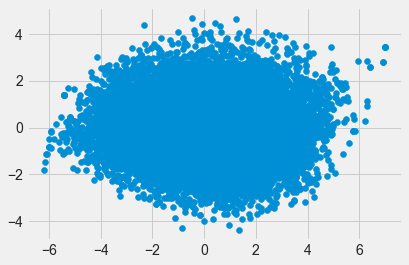

In [ ]:
# Plotting the x and y values of the two dimensions
plt.scatter(X_pca[:,0],X_pca[:,1])

### 4.1 & 4.2 Scatterplot of reduced dimensions


In [ ]:
# Create a dataframe that can be scatter plottet with coloring the clusters

dfCX2=DataFrame(X_pca, index=X.index, columns=['x','y'])
dfCX2.head(3)

,x,y
0,2.702983,-0.999331
1,0.305155,0.496295
2,0.960510,1.591001


In [ ]:
#Adding the columns for the clusters Cluster2 and Cluster3

dfCX2.loc[:,'Cluster2']=y_2df
dfCX2.loc[:,'Cluster3']=df_2Cluster['Cluster3']
dfCX2.tail(10)

,x,y,Cluster2,Cluster3
15961,-0.582391,-1.476792,1,1
15962,-0.798487,1.330173,1,2
15963,-1.420140,0.482800,1,2
15964,2.499971,-0.351373,0,0
15965,1.335094,1.474449,0,0
15966,0.922342,0.332937,0,1
15967,-1.614374,-0.134397,1,2
15968,-1.822743,0.223300,1,2
15969,0.156127,-1.290282,1,1
15970,0.106293,1.248433,0,1


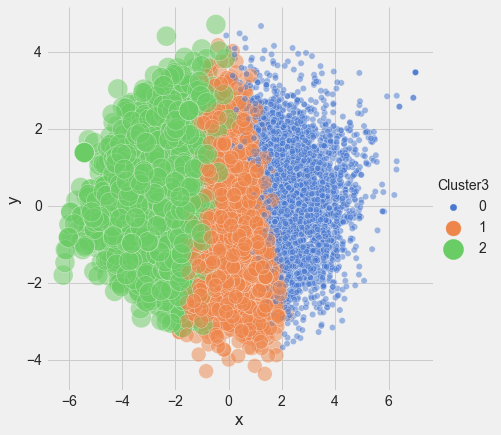

In [ ]:
# Scatter plot three clusters in the reduced dimension of the dataset

sns.relplot(x="x", y="y", hue="Cluster3", size="Cluster3",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dfCX2)

As we can see in above picture, after dimensionality reduction, we have better definition of different clusters.

In [ ]:
# Now, I add WORK_LIFE_BALANCE_SCORE to the data

dfCX2.loc[:,'WLBS']=df_2Cluster['WORK_LIFE_BALANCE_SCORE']

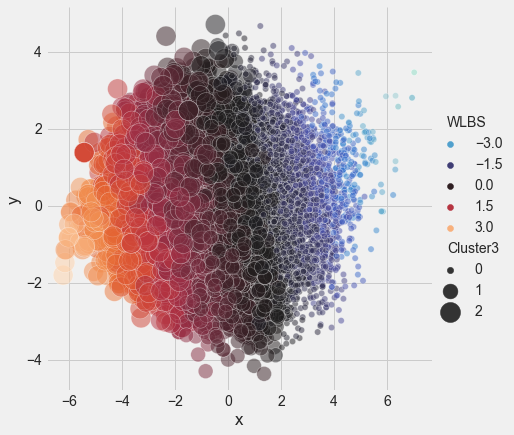

In [ ]:
# Scatter plot three clusters in the reduced dimension of the dataset colored by WORK_LIFE_BALANCE_SCORE

sns.relplot(x="x", y="y", hue="WLBS", size="Cluster3",
            sizes=(40, 400), alpha=.5, palette="icefire",
            height=6, data=dfCX2)

In this study, I have about 16000 repondents that it is meaningless to lable some of them as data points.